In [3]:
import pandas as pd
file_path = 'player_data.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [4]:
df.columns

Index(['Date', 'Player', 'Club', 'Ball', 'Club Speed (mph)',
       'Attack Angle (deg)', 'Club Path (deg)', 'Dyn. Loft(deg)',
       'Face Angle (deg)', 'Face To Path (deg)', 'Ball Speed', 'Smash Factor',
       'Launch Angle (deg)', 'Launch Direction (deg)', 'Spin Rate',
       'Spin Axis', 'Carry (yards)', 'Carry Time (sec)',
       'Total Distance (Yards)', 'Impact Offset (mm)', 'Impact Height (mm)',
       'Curve (ft)', 'Email'],
      dtype='object')

In [ ]:
!streamlit run Trackman.py

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Filter for only 'Driver' club shots with carry distances of at least 240 yards
driver_data = df[(df['Club'] == 'Driver') & (df['Carry (yards)'] >= 240)]


In [8]:
features = driver_data[['Club Speed (mph)', 'Attack Angle (deg)', 'Club Path (deg)', 'Spin Rate', 'Ball Speed']]
target = driver_data['Carry (yards)']

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [10]:
# Initialize the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [11]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 48.07354069999987


In [12]:
import streamlit as st

st.title('Driver Shot Carry Distance Predictor')

# Input fields for features
input_data = {}
for feature in features.columns:
    input_data[feature] = st.number_input(f'Enter {feature}', value=0.0)  # Set default or mean values

if st.button('Predict Carry Distance'):
    input_df = pd.DataFrame([input_data])
    prediction = model.predict(input_df)[0]
    st.write(f'Predicted Carry Distance: {prediction:.2f} yards')


2024-04-29 11:22:34.955 
  command:

    streamlit run C:\Users\calle\anaconda3\envs\MGT4250DV\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


# Visualisation 1 --> Club speed correlation and carry distance with a driver. 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

driver_data = df[(df['Club'] == 'Driver') & (df['Carry (yards)'] >= 240)]

features = df[['Club Speed (mph)', 'Attack Angle (deg)', 'Club Path (deg)']]
target = df['Carry (yards)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(driver_data, target, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Assuming further steps to save and deploy the model


ValueError: Found input variables with inconsistent numbers of samples: [98, 309]

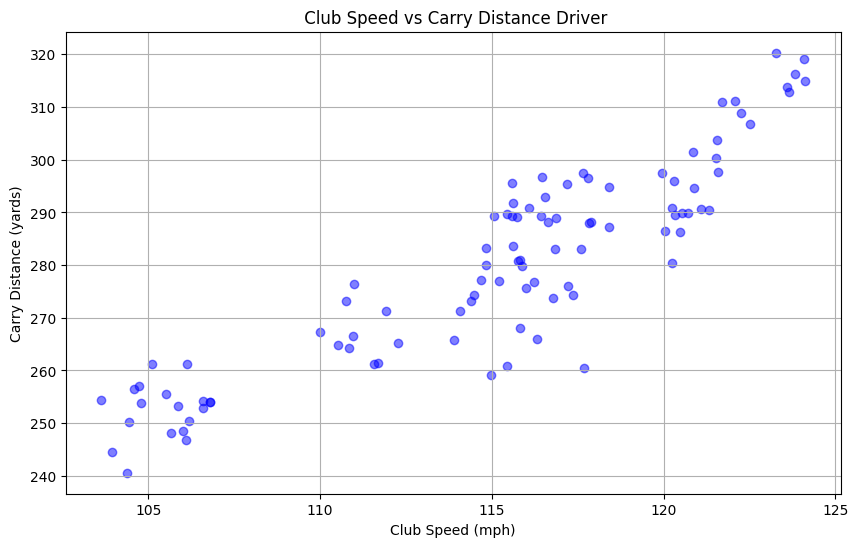

In [3]:
import matplotlib.pyplot as plt

driver_data = data[(data['Club'] == 'Driver') & (data['Carry (yards)'] >= 240)]

#scatter plot of Club Speed vs Carry Distance

plt.figure(figsize=(10, 6))
plt.scatter(driver_data['Club Speed (mph)'], driver_data['Carry (yards)'], color='blue', alpha=0.5)
plt.title(' Club Speed vs Carry Distance Driver')
plt.xlabel('Club Speed (mph)')
plt.ylabel('Carry Distance (yards)')
plt.grid(True)
plt.show()


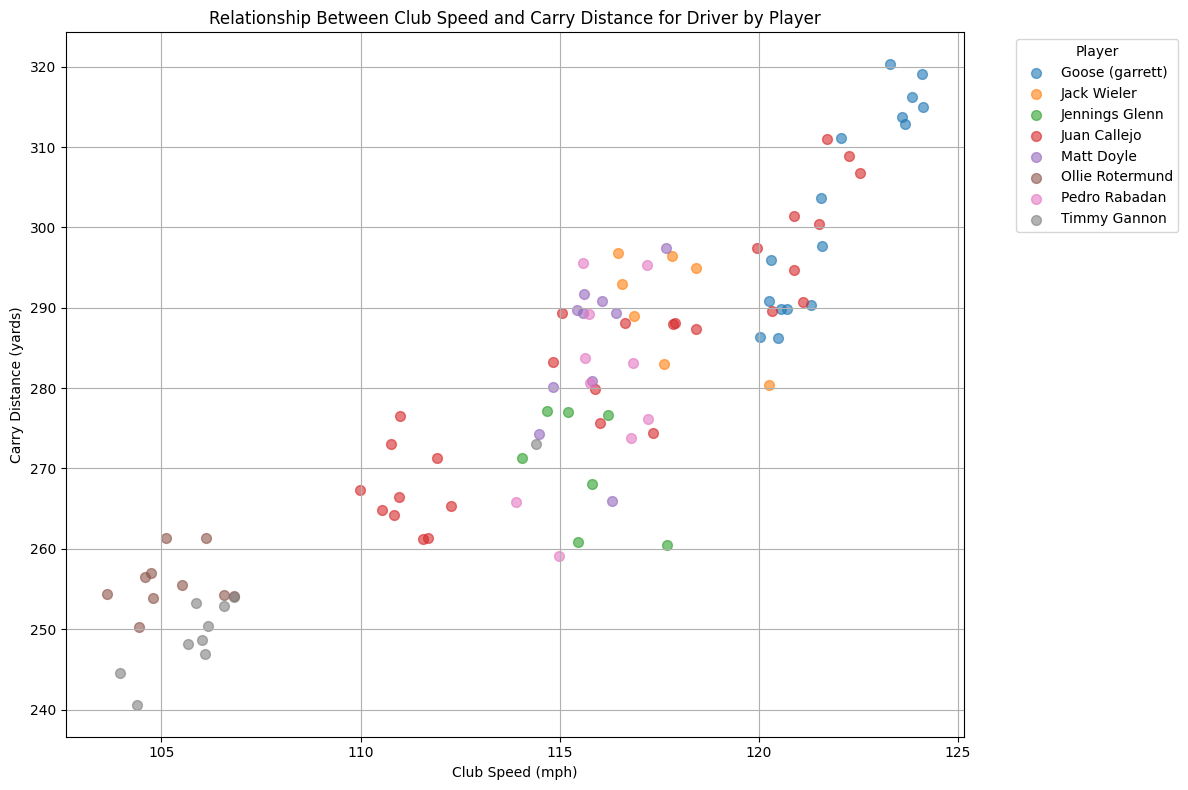

In [4]:
plt.figure(figsize=(12, 8))

for player, group in driver_data.groupby('Player'):
    plt.scatter(group['Club Speed (mph)'], group['Carry (yards)'], label=player, alpha=0.6, s=50)  # s is the size of markers

plt.title('Relationship Between Club Speed and Carry Distance for Driver by Player')
plt.xlabel('Club Speed (mph)')
plt.ylabel('Carry Distance (yards)')
plt.legend(title='Player', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

NameError: name 'np' is not defined

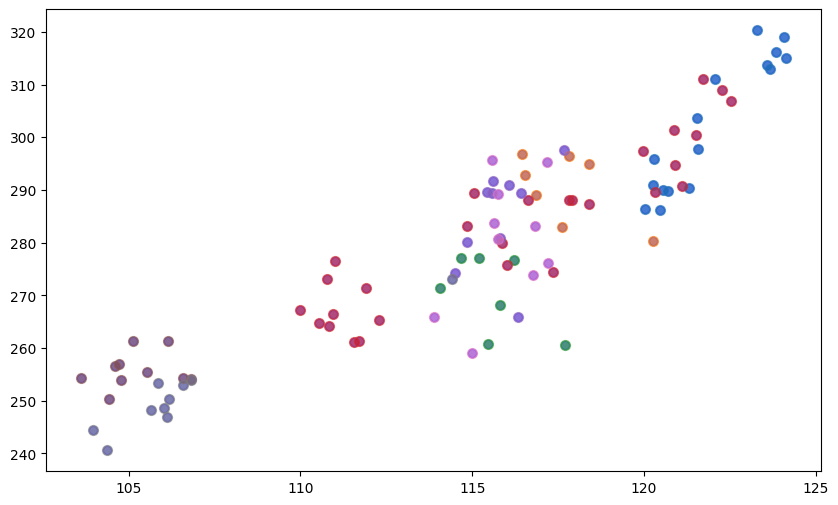

In [5]:
plt.figure(figsize=(10, 6))

# Plotting all players' data in one scatter plot
plt.scatter(driver_data['Club Speed (mph)'], driver_data['Carry (yards)'], color='blue', alpha=0.5, label='Data Points')

for player, group in driver_data.groupby('Player'):
    plt.scatter(group['Club Speed (mph)'], group['Carry (yards)'], label=player, alpha=0.6, s=50)
# Fit a linear regression line to the combined data
if not driver_data['Club Speed (mph)'].empty and not driver_data['Carry (yards)'].empty:
    slope, intercept = np.polyfit(driver_data['Club Speed (mph)'], driver_data['Carry (yards)'], 1)
    # Generate x values for the regression line: from min to max club speed
    x_values = np.linspace(driver_data['Club Speed (mph)'].min(), driver_data['Club Speed (mph)'].max(), 100)
    # Calculate the y values based on the slope and intercept
    y_values = slope * x_values + intercept
    # Plot the regression line
    plt.plot(x_values, y_values, color='red', label='Regression Line')

plt.title('Club Speed vs Carry Distance in Drivers')
plt.xlabel('Club Speed (mph)')
plt.ylabel('Carry Distance (yards)')
plt.legend()
plt.grid(True)
plt.show()

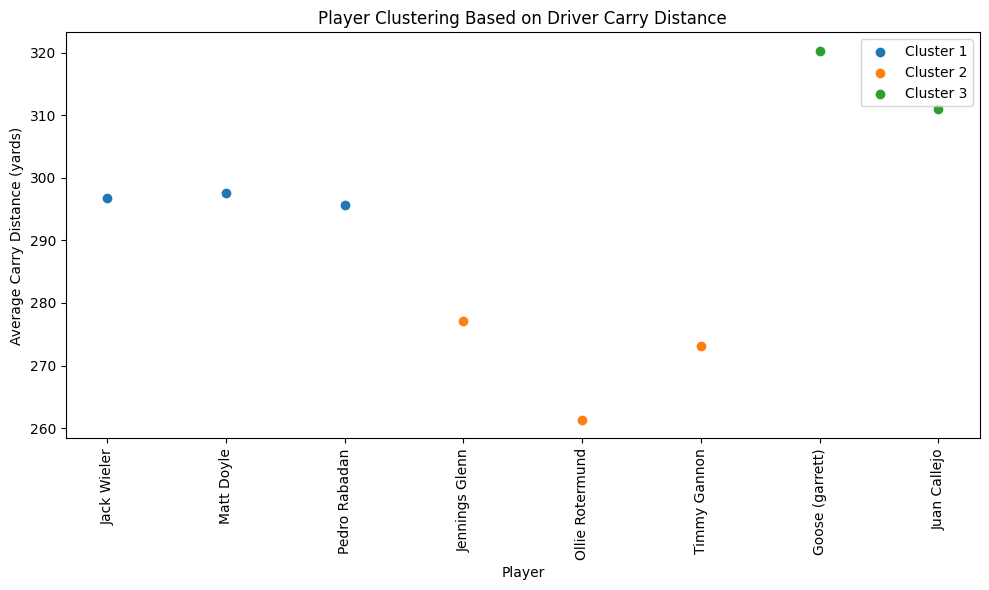

Cluster Centers (Average Carry Distances): [[296.63333333]
 [270.5       ]
 [315.65      ]]


In [12]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


driver_data = data[(data['Club'] == 'Driver') & (data['Carry (yards)'] >= 240)]

# Calculate max carry distance by player for the driver
average_carry_by_player = driver_data.groupby('Player')['Carry (yards)'].max().reset_index()

# Prepare data for clustering
X = average_carry_by_player[['Carry (yards)']]  # Data matrix

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
average_carry_by_player['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in sorted(average_carry_by_player['Cluster'].unique()):
    cluster_data = average_carry_by_player[average_carry_by_player['Cluster'] == cluster]
    plt.scatter(cluster_data['Player'], cluster_data['Carry (yards)'], label=f'Cluster {cluster+1}')

plt.title('Player Clustering Based on Driver Carry Distance')
plt.xlabel('Player')
plt.ylabel('Average Carry Distance (yards)')
plt.xticks(rotation=90)  # Rotate player names for better visibility
plt.legend()
plt.tight_layout()
plt.show()

# Display cluster centers
print("Cluster Centers (Average Carry Distances):", kmeans.cluster_centers_)

In [10]:
average_carry_by_player = driver_data.groupby('Player')['Carry (yards)'].max().reset_index()

# Prepare data for clustering
X = average_carry_by_player[['Carry (yards)']]

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
average_carry_by_player['Cluster'] = kmeans.labels_

# Sort players within each cluster
sorted_players = average_carry_by_player.sort_values(by=['Cluster','Carry (yards)'], ascending=[True, False])

# Define cluster names based on the centers
cluster_names = {i: f"Cluster {i + 1} - {name}" for i, name in enumerate(["Short Drivers", "Moderate Drivers", "Long Drivers"])}

# Map cluster labels to meaningful names
sorted_players['Cluster Name'] = sorted_players['Cluster'].map(cluster_names)

# Visualize the clusters with named labels
plt.figure(figsize=(12, 8))
colors = ['red', 'green', 'blue']  # Different colors for each cluster
for name in sorted(cluster_names.values()):
    cluster_data = sorted_players[sorted_players['Cluster Name'] == name]
    plt.barh(cluster_data['Player'], cluster_data['Carry (yards)'], color=colors[int(name[8])-1], label=name)

plt.title('Ordered Player Clustering Based on Driver Carry Distance')
plt.xlabel('Max Carry Distance (yards)')
plt.ylabel('Player')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to have the highest distances at the top
plt.tight_layout()
plt.show()

NameError: name 'KMeans' is not defined

NameError: name 'np' is not defined

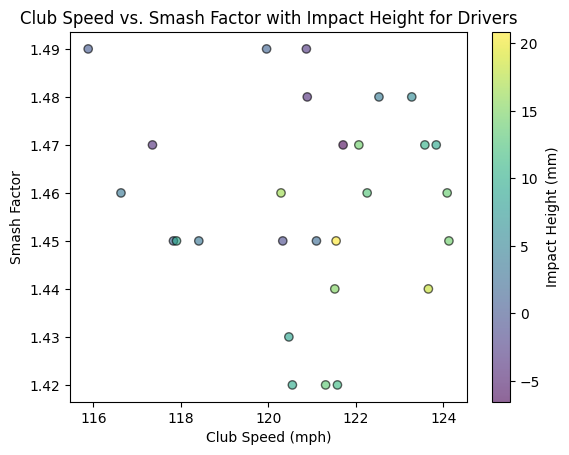

In [8]:
sc = plt.scatter(driver_data['Club Speed (mph)'], driver_data['Smash Factor'],
                 c=driver_data['Impact Height (mm)'], cmap='viridis', alpha=0.6, edgecolor='k')

# Adding a color bar to represent the Impact Offset
cbar = plt.colorbar(sc)
cbar.set_label('Impact Height (mm)')

# Adding annotations and labels
plt.title('Club Speed vs. Smash Factor with Impact Height for Drivers')
plt.xlabel('Club Speed (mph)')
plt.ylabel('Smash Factor')

# Adding trend line for general relationship, if required
z = np.polyfit(driver_data['Club Speed (mph)'], driver_data['Smash Factor'], 1)
p = np.poly1d(z)
plt.plot(driver_data['Club Speed (mph)'], p(driver_data['Club Speed (mph)']), "r--")

plt.grid(True)
plt.show()

## How does impact position affect ball speed?

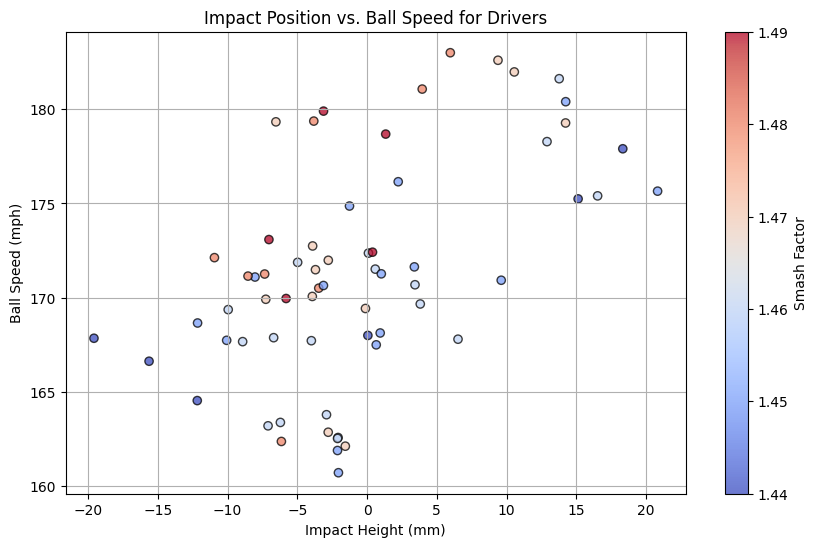

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

driver_data = data[(data['Club'] == 'Driver') & (data['Carry (yards)'] >= 240)& (data['Smash Factor'] >= 1.435) & (data['Ball Speed'] >= 160)]

# Creating the scatter plot
plt.figure(figsize=(10, 6))
sc = plt.scatter(driver_data['Impact Height (mm)'], driver_data['Ball Speed'],
                 c=driver_data['Smash Factor'], cmap='coolwarm', edgecolor='black', alpha=0.75)

# Adding a color bar to indicate smash factor
cbar = plt.colorbar(sc)
cbar.set_label('Smash Factor')

# Adding annotations and labels
plt.title('Impact Position vs. Ball Speed for Drivers')
plt.xlabel('Impact Height (mm)')
plt.ylabel('Ball Speed (mph)')
plt.grid(True)
plt.show()

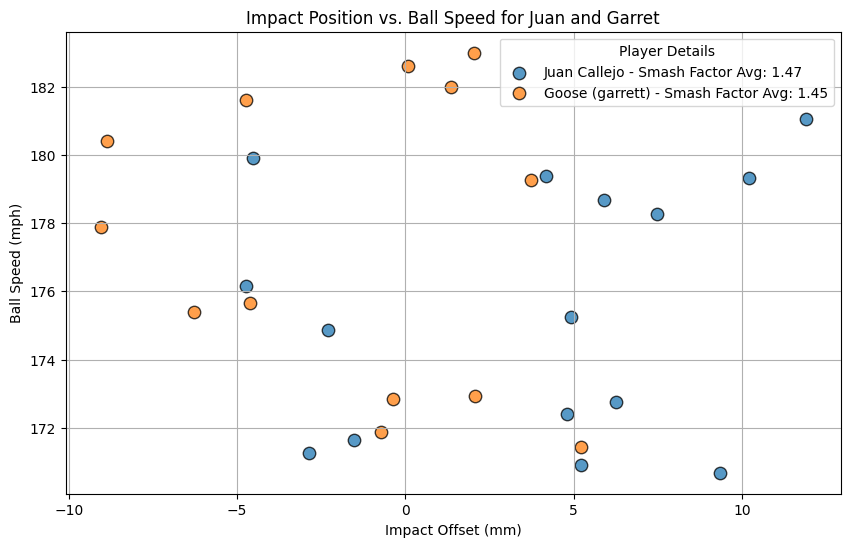

In [7]:


selected_players = ['Juan Callejo', 'Goose (garrett)']  # Assuming these are the names used in the 'Player' column
driver_data = data[(data['Club'] == 'Driver') & 
                   (data['Player'].isin(selected_players)) & 
                   (data['Ball Speed'] > 170)]
# Creating the scatter plot
plt.figure(figsize=(10, 6))
for player in selected_players:
    player_data = driver_data[driver_data['Player'] == player]
    plt.scatter(player_data['Impact Offset (mm)'], player_data['Ball Speed'],
                label=f'{player} - Smash Factor Avg: {player_data["Smash Factor"].mean():.2f}',
                alpha=0.75, edgecolor='black', s=80)  # Size set to 80 for better visibility

# Adding legend
plt.legend(title="Player Details")

# Adding annotations and labels
plt.title('Impact Position vs. Ball Speed for Juan and Garret')
plt.xlabel('Impact Offset (mm)')
plt.ylabel('Ball Speed (mph)')
plt.grid(True)
plt.show()

In [ ]:
#Visualisation 3 --> 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
filtered_data = data[(data['Club'] == '54º Wedge') & 
                     (data['Carry (yards)'] >= 95) &
                     (data['Carry (yards)'] <= 110)& (data['Spin Rate'] <= 10000) & (data['Spin Rate'] >= 3000) & (data['Player'] == "Juan Callejo") ]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
sns.scatterplot(x='Carry (yards)', y='Spin Rate',hue='Player', data=filtered_data, ax=axes[0, 0], color='blue', edgecolor='black')
sns.scatterplot(x='Attack Angle (deg)', y='Spin Rate', data=filtered_data, ax=axes[0, 1], color='green', edgecolor='black')
sns.scatterplot(x='Impact Offset (mm)', y='Spin Rate', data=filtered_data, ax=axes[1, 0], color='red', edgecolor='black')
sns.scatterplot(x='Dyn. Loft(deg)', y='Spin Rate', data=filtered_data, ax=axes[1, 1], color='purple', edgecolor='black')

axes[0, 0].set_title('Carry (yards) vs Spin Rate')
axes[0, 1].set_title('Attack Angle vs Spin Rate')
axes[1, 0].set_title('Impact Offset vs Spin Rate')
axes[1, 1].set_title('Dynamic Loft vs Spin Rate')

plt.tight_layout()
plt.show()

In [ ]:
#

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filtered_data = data[(data['Club'] == 'Driver') & (data['Carry (yards)'] > 250)]

# Creating the density scatter plot using hexbin
plt.figure(figsize=(10, 8))
hb = plt.hexbin(filtered_data['Impact Offset (mm)'], filtered_data['Impact Height (mm)'],
                gridsize=50, cmap='viridis', bins='log')

# Adding a color bar to show the log-scaled density
cb = plt.colorbar(hb)
cb.set_label('log10(N)')

# Adding annotations and labels
plt.title('Impact Offset vs Impact Height for Drivers Over 250 Yards Carry - Density Map')
plt.xlabel('Impact Offset (mm)')
plt.ylabel('Impact Height (mm)')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image


filtered_data = data[(data['Club'] == 'Driver') & (data['Carry (yards)'] > 250)]

# Load the background image of a golf club
club_image_path = 'TrackMan-Impact-Location.webp'
club_image = Image.open(club_image_path)

# Determine the pixel width and height of the area on the image representing the club face
image_width_px = club_image.width
image_height_px = club_image.height

# Find the maximum absolute values of impact offset and height
max_offset = filtered_data['Impact Offset (mm)'].abs().max()
max_height = filtered_data['Impact Height (mm)'].abs().max()

# Calculate scale factors to convert millimeters to pixels for the image
# Assuming the image's origin (0,0) is at the center of the clubface
image_width_scale = image_width_px / (2 * max_offset)  # The 2* is because offset can be positive and negative
image_height_scale = image_height_px / (2 * max_height)  # Adjust if necessary

# Normalize your impact data to match the image scale here
filtered_data['Normalized Offset'] = (filtered_data['Impact Offset (mm)'] + max_offset) * image_width_scale
filtered_data['Normalized Height'] = (max_height - filtered_data['Impact Height (mm)']) * image_height_scale
# We add max_offset to center the data and we subtract from max_height to invert the y-axis

# Plot the data on top of the image
plt.figure(figsize=(club_image.width / 100, club_image.height / 100), dpi=100)  # Adjust figure size based on image size and DPI
plt.imshow(club_image)

# Overlay the impact points, adjusting for the club image's orientation and origin
plt.scatter(filtered_data['Normalized Offset'], filtered_data['Normalized Height'], alpha=0.6, color='orange', edgecolor='black')

# Hide the axes
plt.axis('off')

plt.show()

In [ ]:
#How consistent with the swing are the players for a distance? 175 yards

In [ ]:
!streamlit run Trackman.py

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Filter data for shots within 165 to 185 yards for all players
dispersion_data = data[(data['Carry (yards)'] >= 150 ) & (data['Carry (yards)'] <= 200)]

# Creating the boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Carry (yards)', y='Player', data=dispersion_data, orient='h', palette="Set2")

# Adding line for target distance
plt.axvline(x=175, color='red', linestyle='--', label='Target Distance (100 yards)')

# Adding annotations and labels
plt.title('Carry Dispersion for 100 yd Shots')
plt.xlabel('Carry Distance (yards)')
plt.ylabel('Player')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import tree
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [ ]:
# Select features and target
X = df[['Club Speed (mph)', 'Attack Angle (deg)', 'Club Path (deg)', 'Dyn. Loft(deg)', 'Face Angle (deg)', 'Ball Speed', 'Smash Factor', 'Launch Angle (deg)', 'Spin Rate']]
y = df['Carry (yards)']

# Handle any missing values, categorical variables, etc.
X.fillna(X.mean(), inplace=True)  # Example: fill missing values with mean

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Attack Angle', y='Spin Rate', data=df, hue='Player', style='Club Type')
plt.title('Relationship between Attack Angle and Spin Rate')
plt.xlabel('Attack Angle (degrees)')
plt.ylabel('Spin Rate (rpm)')
plt.show()